## Time-series Analysis

In [82]:
# import libraries and data
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns  
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as datetime

In [85]:
# first data set
df1 = pd.read_csv("C:/Users/ryans/Documents/Predictive Modeling/Time-Series/online_retail_I1.csv", parse_dates = ['InvoiceDate'])
# second data set
df2 = pd.read_csv("C:/Users/ryans/Documents/Predictive Modeling/Time-Series/online_retail_I2.csv", parse_dates = ['InvoiceDate'])

In [68]:
# create one data frame
df = [df1, df2]
df = pd.concat(df)

In [69]:
# check data types to ensure date is correct
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [70]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [71]:
# create a data frame of date and sales for time series analysis
data = df[['Quantity', 'InvoiceDate']]

In [72]:
# put date in first column 
data = data.iloc[:, [1, 0]]

In [73]:
# change name of InvoiceDate to Date and Quantity to Sales
data.columns = ['date', 'sales']
data.head()

,date,sales
0,2009-12-01 07:45:00,12
1,2009-12-01 07:45:00,12
2,2009-12-01 07:45:00,12
3,2009-12-01 07:45:00,48
4,2009-12-01 07:45:00,24


In [74]:
# change dates to be grouped by days and months, not exact time of purchase
data_day = data.set_index('date').resample('D').sum()
# since we set index to date column we lost that column. Add it back to df
data_day['date'] = data_day.index
# put date first and sales next
data_day = data_day.iloc[:,[1, 0]]

# view it
data_day

,date,sales
date,,
2009-12-01,2009-12-01,24022
2009-12-02,2009-12-02,29942
2009-12-03,2009-12-03,44896
2009-12-04,2009-12-04,21001
2009-12-05,2009-12-05,5033
...,...,...
2011-12-05,2011-12-05,44119
2011-12-06,2011-12-06,29026
2011-12-07,2011-12-07,39612


In [75]:
# create a data set for months
data_month = data.set_index('date').resample('M').sum()
# since we set index to date column we lost that column. Add it back to df
data_month['date'] = data_month.index
# put date first and sales next
data_month = data_month.iloc[:,[1, 0]]

# view it
data_month

,date,sales
date,,
2009-12-31,2009-12-31,420088
2010-01-31,2010-01-31,375363
2010-02-28,2010-02-28,368402
2010-03-31,2010-03-31,489370
2010-04-30,2010-04-30,351971
2010-05-31,2010-05-31,364095
2010-06-30,2010-06-30,388253
2010-07-31,2010-07-31,302201
2010-08-31,2010-08-31,451803


In [76]:
# describe the data
data.describe()

,sales
count,1.067371e+06
mean,9.938898e+00
std,1.727058e+02
min,-8.099500e+04
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,8.099500e+04


In [77]:
# graph the series 
# creat a method to pass a plot to. This is to create a standard plot
def plot_retail(retail, x, y, title="", xlabel='Date', ylabel='Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

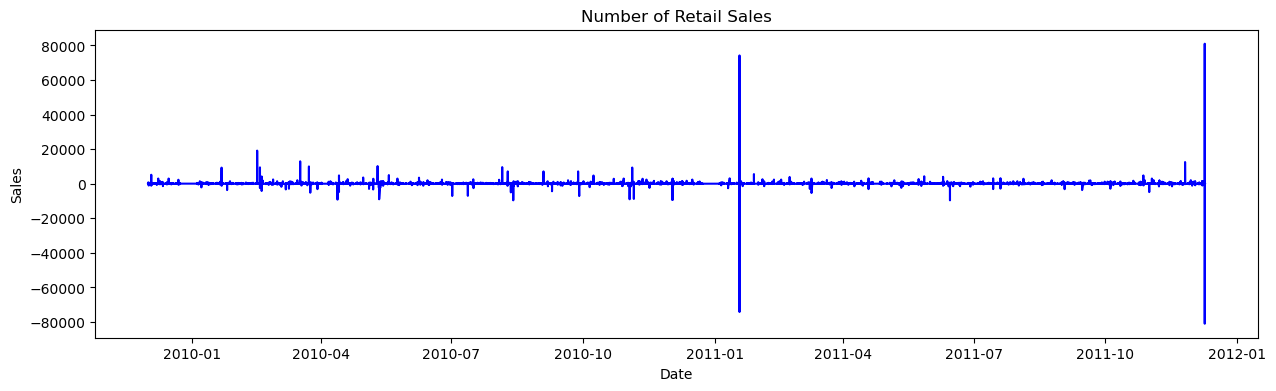

In [78]:
# pass our plot to the method
plot_retail(data, x=data['date'], y=data['sales'], title='Number of Retail Sales')

In [79]:
# add slider
import plotly.express as px
fig = px.line(data_day, x = 'date', y = 'sales', title= 'Number of Sales with Slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

<Axes: xlabel='day'>

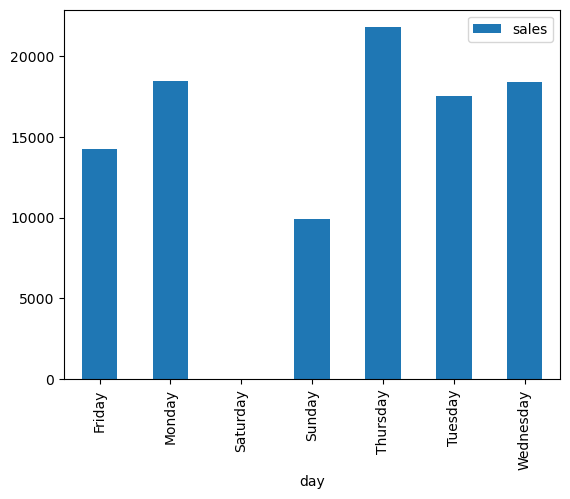

In [81]:
# plot the weekday sales
data_day['day'] = data_day['date'].dt.day_name()
data_day[['day', 'sales']].groupby('day').mean().plot(kind='bar')